# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 571


['grytviken',
 'waitangi',
 'west island',
 'port hedland',
 'simpang',
 'bredasdorp',
 'puerto ayora',
 'olonkinbyen',
 'adamstown',
 'badger',
 'bethel',
 'punta arenas',
 'port-aux-francais',
 'vavoua',
 'gakem',
 'hilo',
 'port mathurin',
 'arraial do cabo',
 'ust-nera',
 'wellington',
 'bamboo flat',
 'albany',
 'juan griego',
 'cockburn town',
 'ketchikan',
 'crane',
 'margaret river',
 'hawaiian paradise park',
 'georgetown',
 'happy valley-goose bay',
 'constantia',
 'qaqortoq',
 'puerto natales',
 'fale old settlement',
 'souillac',
 'tiksi',
 'taltal',
 'atafu village',
 'port elizabeth',
 'nuuk',
 'udachny',
 'santana',
 'longyearbyen',
 'marsh harbour',
 'taiohae',
 'puerto san carlos',
 'vanimo',
 'ribeira grande',
 'ad dawadimi',
 'praia da vitoria',
 'humahuaca',
 "ust'-kulom",
 'aykhal',
 'pali',
 'iqaluit',
 'yellowknife',
 'dolores',
 'diano marina',
 'mata-utu',
 'princeville',
 'vilyuchinsk',
 'el colomo',
 'ilulissat',
 'hammerfest',
 'edinburgh of the seven seas',

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="
query_url = f"{url}{weather_api_key}"
#query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + "&q=" + city
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data

        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | west island
Processing Record 4 of Set 1 | port hedland
Processing Record 5 of Set 1 | simpang
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | olonkinbyen
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | badger
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | vavoua
Processing Record 15 of Set 1 | gakem
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | port mathurin
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | wellington
Processing Record 21 of Set 1 | bamboo flat
Processing Record 22 of Set 1 | albany
Processing Reco

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data
city_data_df = pd.DataFrame(city_data)
city_data_df
# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [20]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,2.85,83,57,2.56,GS,1709870407
1,waitangi,-43.9535,-176.5597,16.01,72,23,1.34,NZ,1709870408
2,west island,-12.1568,96.8225,26.99,94,40,5.14,CC,1709870411
3,port hedland,-20.3167,118.5667,35.03,49,75,1.54,AU,1709870413
4,simpang,-1.2667,104.0833,24.83,92,100,1.86,ID,1709870414
...,...,...,...,...,...,...,...,...,...
542,kozyatyn,49.7143,28.8339,-2.17,76,9,1.85,UA,1709870576
543,pembroke,45.8168,-77.1162,-3.01,69,56,1.98,CA,1709870499
544,carutapera,-1.1950,-46.0200,25.38,93,100,2.33,BR,1709870576
545,kitimat,54.0524,-128.6534,2.21,70,100,1.17,CA,1709870576


In [21]:
import os
from pathlib import Path

# Specify the directory path
output_dir = "output_data"

# Create the directory if it doesn't exist
Path(output_dir).mkdir(parents=True, exist_ok=True)

# Export the City_Data into a csv
city_data_df.to_csv(f"{output_dir}/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.85,83,57,2.56,GS,1709870407
1,waitangi,-43.9535,-176.5597,16.01,72,23,1.34,NZ,1709870408
2,west island,-12.1568,96.8225,26.99,94,40,5.14,CC,1709870411
3,port hedland,-20.3167,118.5667,35.03,49,75,1.54,AU,1709870413
4,simpang,-1.2667,104.0833,24.83,92,100,1.86,ID,1709870414


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

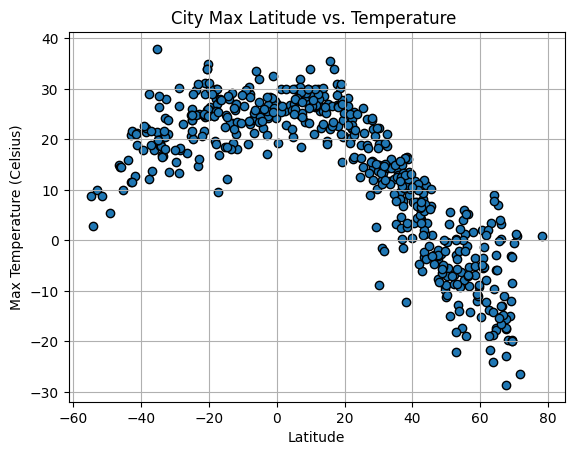

In [23]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o",edgecolor='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature ")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

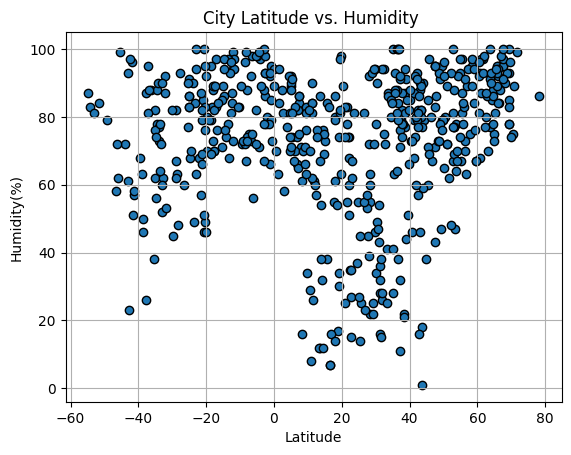

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o",edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity ")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

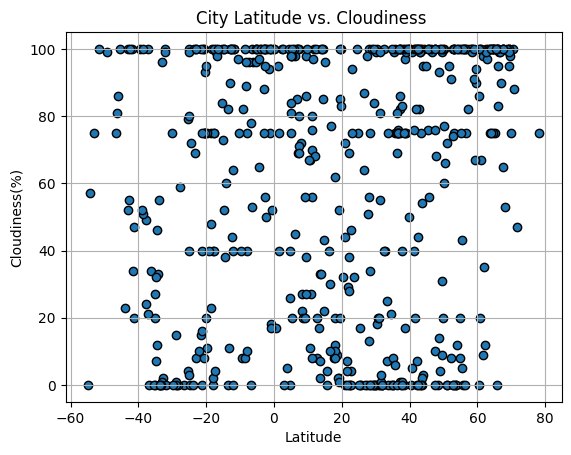

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o",edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness ")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

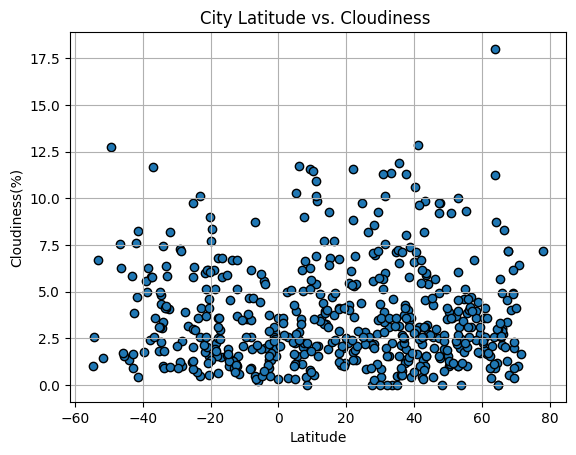

In [26]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o",edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness ")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

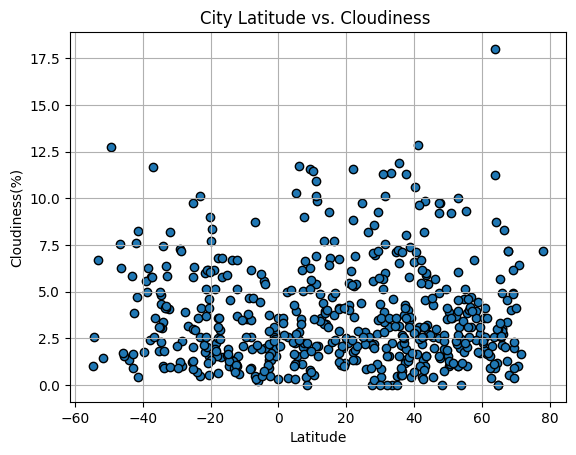

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o",edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness ")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_data_df["Lat"], city_data_df["Max Temp"])
regress_values = city_data_df["Lat"] * slope + intercept
print(regress_values)

City_ID
0      36.836337
1      33.497210
2      23.216678
3      25.854943
4      19.695683
         ...    
542     3.212469
543     4.472612
544    19.672501
545     1.809872
546    25.991061
Name: Lat, Length: 547, dtype: float64


In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_data = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemisphere_data_df = pd.DataFrame(northern_hemisphere_data)
northern_hemisphere_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,olonkinbyen,70.9221,-8.7187,0.85,89,88,6.41,SJ,1709870416
9,badger,64.8000,-147.5333,-5.86,75,100,0.00,US,1709870417
10,bethel,41.3712,-73.4140,7.51,79,40,3.09,US,1709870352
13,vavoua,7.3819,-6.4778,24.70,84,100,2.05,CI,1709870418
14,gakem,6.7658,8.9881,24.76,82,100,3.56,NG,1709870419


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_data = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemisphere_data_df = pd.DataFrame(southern_hemisphere_data)
southern_hemisphere_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.85,83,57,2.56,GS,1709870407
1,waitangi,-43.9535,-176.5597,16.01,72,23,1.34,NZ,1709870408
2,west island,-12.1568,96.8225,26.99,94,40,5.14,CC,1709870411
3,port hedland,-20.3167,118.5667,35.03,49,75,1.54,AU,1709870413
4,simpang,-1.2667,104.0833,24.83,92,100,1.86,ID,1709870414


###  Temperature vs. Latitude Linear Regression Plot

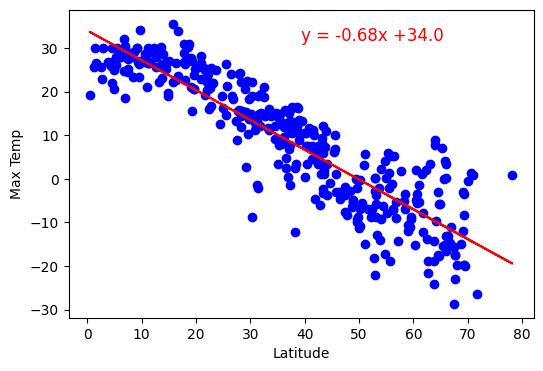

In [65]:
# Linear regression on Northern Hemisphere
# Select temperature and latitude columns
temperature = northern_hemisphere_data['Max Temp']
latitude = northern_hemisphere_data['Lat']

# Calculate the regression line
slope, intercept = np.polyfit(latitude, temperature, 1)
regression_line = slope * latitude + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create a scatter plot and overlay the regression line
plt.figure(figsize=(6, 4))
plt.scatter(latitude, temperature, color='blue', label='Data Points')
plt.plot(latitude, regression_line, color='red', label='Regression Line')
plt.text(0.5, 0.9, line_eq, fontsize=12, transform=plt.gca().transAxes, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

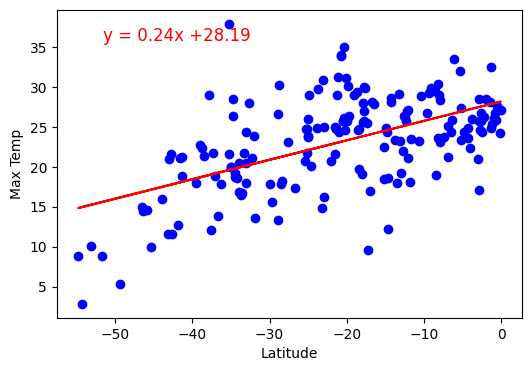

In [66]:
# Linear regression on Southern Hemisphere
temperature = southern_hemisphere_data['Max Temp']
latitude = southern_hemisphere_data['Lat']

# Calculate the regression line
slope, intercept = np.polyfit(latitude, temperature, 1)
regression_line = slope * latitude + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create a scatter plot and overlay the regression line
plt.figure(figsize=(6, 4))
plt.scatter(latitude, temperature, color='blue', label='Data Points')
plt.plot(latitude, regression_line, color='red', label='Regression Line')
plt.text(0.1, 0.9, line_eq, fontsize=12, transform=plt.gca().transAxes, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

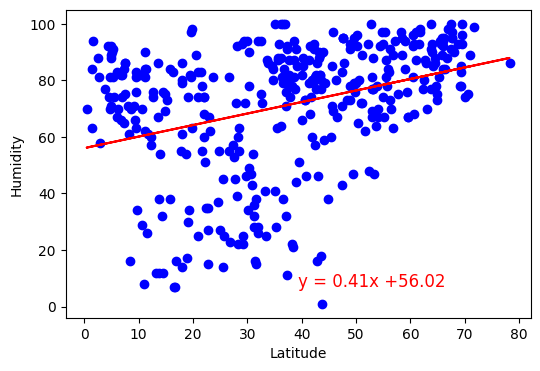

In [69]:
# Northern Hemisphere
humidity = northern_hemisphere_data['Humidity']
latitude = northern_hemisphere_data['Lat']

# Calculate the regression line
slope, intercept = np.polyfit(latitude, humidity, 1)
regression_line = slope * latitude + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create a scatter plot and overlay the regression line
plt.figure(figsize=(6, 4))
plt.scatter(latitude, humidity, color='blue', label='Data Points')
plt.plot(latitude, regression_line, color='red', label='Regression Line')
plt.text(0.5, 0.1, line_eq, fontsize=12, transform=plt.gca().transAxes, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

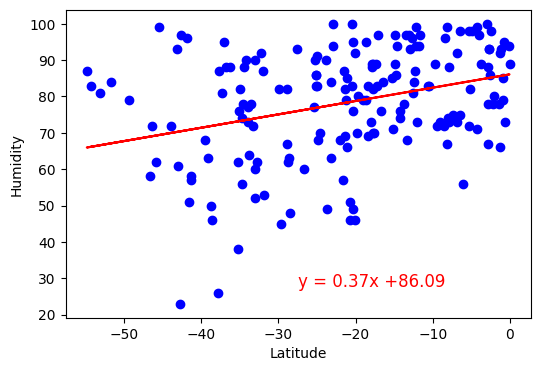

In [70]:
# Southern Hemisphere
humidity = southern_hemisphere_data['Humidity']
latitude = southern_hemisphere_data['Lat']

# Calculate the regression line
slope, intercept = np.polyfit(latitude, humidity, 1)
regression_line = slope * latitude + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create a scatter plot and overlay the regression line
plt.figure(figsize=(6, 4))
plt.scatter(latitude, humidity, color='blue', label='Data Points')
plt.plot(latitude, regression_line, color='red', label='Regression Line')
plt.text(0.5, 0.1, line_eq, fontsize=12, transform=plt.gca().transAxes, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

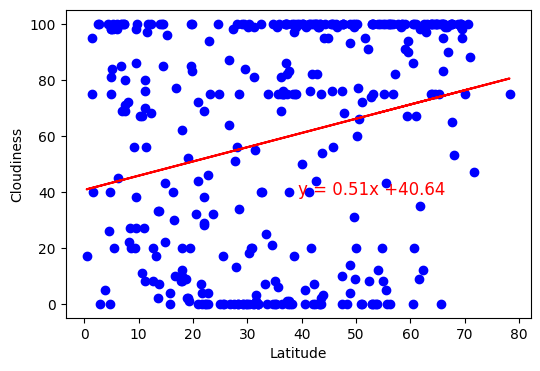

In [79]:
# Northern Hemisphere
cloudiness = northern_hemisphere_data['Cloudiness']
latitude = northern_hemisphere_data['Lat']

# Calculate the regression line
slope, intercept = np.polyfit(latitude, cloudiness, 1)
regression_line = slope * latitude + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create a scatter plot and overlay the regression line
plt.figure(figsize=(6, 4))
plt.scatter(latitude, cloudiness, color='blue', label='Data Points')
plt.plot(latitude, regression_line, color='red', label='Regression Line')
plt.text(0.5, 0.4, line_eq, fontsize=12, transform=plt.gca().transAxes, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

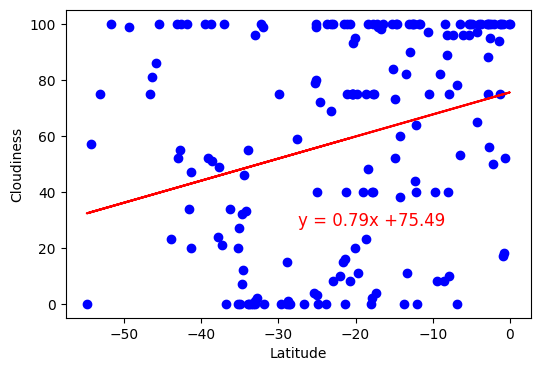

In [81]:
# Southern Hemisphere
# Northern Hemisphere
cloudiness = southern_hemisphere_data['Cloudiness']
latitude = southern_hemisphere_data['Lat']

# Calculate the regression line
slope, intercept = np.polyfit(latitude, cloudiness, 1)
regression_line = slope * latitude + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create a scatter plot and overlay the regression line
plt.figure(figsize=(6, 4))
plt.scatter(latitude, cloudiness, color='blue', label='Data Points')
plt.plot(latitude, regression_line, color='red', label='Regression Line')
plt.text(0.5, 0.3, line_eq, fontsize=12, transform=plt.gca().transAxes, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

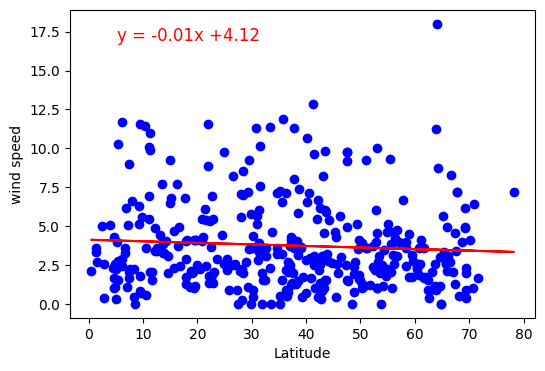

In [72]:
# Northern Hemisphere
wind_speed = northern_hemisphere_data['Wind Speed']
latitude = northern_hemisphere_data['Lat']

# Calculate the regression line
slope, intercept = np.polyfit(latitude, wind_speed, 1)
regression_line = slope * latitude + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create a scatter plot and overlay the regression line
plt.figure(figsize=(6, 4))
plt.scatter(latitude, wind_speed, color='blue', label='Data Points')
plt.plot(latitude, regression_line, color='red', label='Regression Line')
plt.text(0.1, 0.9, line_eq, fontsize=12, transform=plt.gca().transAxes, color='red')
plt.xlabel('Latitude')
plt.ylabel('wind speed')
plt.show()

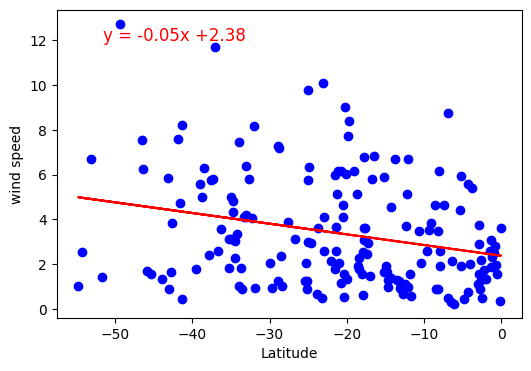

In [74]:
# Southern Hemisphere
wind_speed = southern_hemisphere_data['Wind Speed']
latitude = southern_hemisphere_data['Lat']

# Calculate the regression line
slope, intercept = np.polyfit(latitude, wind_speed, 1)
regression_line = slope * latitude + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create a scatter plot and overlay the regression line
plt.figure(figsize=(6, 4))
plt.scatter(latitude, wind_speed, color='blue', label='Data Points')
plt.plot(latitude, regression_line, color='red', label='Regression Line')
plt.text(0.1, 0.9, line_eq, fontsize=12, transform=plt.gca().transAxes, color='red')
plt.xlabel('Latitude')
plt.ylabel('wind speed')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE